Git
how to choose companies
Time stamp
Feature, Target

words or sentence? -> libraries to calculate sentiment
predictprob function
lower - case

In [1]:
import string
import pandas as pd
import numpy as np
import datetime 
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from wordcloud import WordCloud
import seaborn as sns

In [2]:
#import the stock price data
SP_df = pd.read_csv("WIKI_PRICES.csv")

In [3]:
SP_df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.105117,34.181447,27.345157,30.079673,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.355027,29.396044,27.215268,27.604936,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.240711,30.079673,27.386175,30.079673,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,29.054230,29.826730,27.516065,27.516065,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.434029,28.671398,27.345157,28.069804,3464400.0


In [4]:
#check the number of data
len(SP_df)

14935063

In [5]:
#import the news data
NEWS_df = pd.read_csv("uci-news-aggregator.csv")

In [6]:
NEWS_df = NEWS_df[NEWS_df['CATEGORY']=='b']
NEWS_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [7]:
print(NEWS_df['TIMESTAMP'].min())
print(NEWS_df['TIMESTAMP'].max())

1394470370698
1409200543846


In [8]:
#check the number of data
len(NEWS_df)

115967

In [9]:
new_ticker1_df = pd.read_csv("companylist.csv")
new_ticker2_df = pd.read_csv("companylistNYSE.csv")
new_ticker_df = pd.concat([new_ticker1_df, new_ticker2_df])

In [10]:
new_ticker_df.head()

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,PIH,"1347 Property Insurance Holdings, Inc.",7.825,4.661169e+07,n/a,2014,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN
1,TURN,180 Degree Capital Corp.,1.6,4.979450e+07,n/a,n/a,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN
2,FLWS,"1-800 FLOWERS.COM, Inc.",9.65,6.304837e+08,n/a,1999,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN
3,FCCY,1st Constitution Bancorp (NJ),17.25,1.384716e+08,n/a,n/a,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,NaN
4,SRCE,1st Source Corporation,48.67,1.261704e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,NaN


In [11]:
# create a dictionary which includes the companis' name and ticker
companies = {}
for ind, row in new_ticker_df.iterrows():
    companies[row['Name']] = row['Symbol']

In [12]:
remove_list = ['inc', 'plc', 'ltd', 'corporation', 'corp', 'incorporated', 'limited']
translator = str.maketrans('', '', string.punctuation)
filtered_companies = {}
for name, ticker in companies.items():
    lowercase_name = name.lower()
    lowercase_name = lowercase_name.translate(translator)
    for word in remove_list:
        lowercase_name = lowercase_name.replace(word, "")
        
    lowercase_name = lowercase_name.rstrip()
    filtered_companies[lowercase_name] = ticker

In [13]:
# companies = {"3M": "MMM",
#              "American Express":"AXP",
#              "Apple":"AAPL",
#              "Boeing":"BA",
#              "Caterpillar":"CAT",
#              "Chevron":"CVX",
#              "Cisco Systems":"CSCO",
#              "Coca-Cola":"KO",
#              "DuPont":"DD",
#              "ExxonMobil":"XOM",
#              "General Electric":"GE",
#              "Goldman Sachs":"GS",
#              "Home Depot":"HD",
#              "IBM":"IBM",
#              "Intel":"INTC",
#              "Johnson & Johnson":"JNJ",
#              "JPMorgan Chase":"JPM",
#              "McDonald's":"MCD",
#              "Merck":"MRK",
#              "Microsoft":"MSFT",
#              "Nike":"NKE",
#              "Pfizer":"PFE",
#              "Procter & Gamble":"PG",
#              "Travelers":"TRV",
#              "UnitedHealth Group":"UNH",
#              "United Technologies":"UTX",
#              "Verizon":"VZ",
#              "Visa":"V",
#              "Walmart":"WMT",
#              "Walt Disney":"DIS"
# }

In [14]:
#try to check whether there is enough data for above companies

# def count_news(companies):
#     total = 0
#     news_count = {}
#     for key, item in companies.items():
#         num =  len(NEWS_df[NEWS_df['TITLE'].str.contains(key, na=False)])
#         total += num
#         news_count[key] = num
    
#     return total, news_count

# total, news_count = count_news(companies)
# print(total)
# print(news_count)

In [15]:
#try to check whether there is corresponding stock price data for above companies

# for key, item in companies.items():
#     if item in SP_df['ticker'].values:
#         continue
#     else:
#         print('Following company doesn\'nt exist: {}'.format(item))

In [16]:
#delete the companies with the small number of news in NEWS_df

# for key, item in news_count.items():
#     if news_count[key] < 100:
#         companies.pop(key)

# total_v2, news_count_v2 = count_news(companies)
# print(total_v2)
# print(news_count_v2)

In [17]:
#drop the unnecessary column of NEWS_df

# NEWS_df = NEWS_df.drop(["STORY","HOSTNAME"], axis=1)
# NEWS_df.columns

In [18]:
#convert timestamp to date
NEWS_df['TIMESTAMP'] = pd.to_datetime(NEWS_df['TIMESTAMP'], unit='ms')

In [19]:
#Create a function that determine whether the news title includes any company

def company_in_news(paragraph, companies):
    """
    input; paragraph: string, companies: dictionary
    output; boolean
    """
    #words = paragraph.split()
    is_inNews = False
    for name, ticker in companies.items():
        if ' ' + name + ' ' in paragraph or ' ' + ticker + ' ' in paragraph:
            return ticker
    
    return np.nan

In [20]:
# create a new column that have a ticker corresponding each news
NEWS_df['ticker'] = NEWS_df['TITLE'].apply(company_in_news, args=(filtered_companies,))
NEWS_companies_df = NEWS_df.dropna(how='any')

memo for myself  
__number difference with str.contain()__  
len(NEWS_companies_df)

In [21]:
#create the new dataframe which consists of relevant news only

# NEWS_companies_df = NEWS_df[NEWS_df['TITLE'].apply(company_in_news, args=(filtered_companies,)) == True]

In [22]:
#create a function which give the label of the company's ticker to the news

# def label_news(paragraph, companies):
#     """
#     input; paragraph: string, companies: dictionary
#     output; name: company's ticker
#     """
#     words = paragraph.split()
#     for i in range(len(words)):
#         if words[i] in companies.keys():
#             return companies[words[i]]
    
#     return 'NaN'



In [23]:
#remove company's name in news title

def remove_names(paragraph, companies):
    """
    input; paragraph: string, companies: dictionary
    output; name: company's ticker
    """
    words = paragraph.split()
    for i in range(len(words)):
        if words[i] in companies.keys() or words[i] in companies.items():
            return paragraph.replace(words[i], "")
    
    return paragraph

NEWS_companies_df['TITLE'] = NEWS_companies_df['TITLE'].apply(remove_names, args=(filtered_companies,))

C:\Users\the_b\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


memo for myself  
__could be together with company_in_news__  
__got a warning__

In [24]:
# create a list that store the dates in order
date_set = set(SP_df['date'])
date_list = list(date_set)
date_list.sort()

# create a list that gives the adj_close corresponding date and ticker
combi = {}
for date, ticker, close in zip(SP_df['date'], SP_df['ticker'], SP_df['adj_close']):
    combi[(date, ticker)] = close

In [25]:
#create a function that takes the corresponding the stock price move
#this function runs very slow. next cell might take more than 10 mins to run
def get_move(row):
    
    """
    input; row: entire row, SP_df: DataFrame of stock price
    output; boolean
    """    
    
    date_tmp = row['TIMESTAMP']
    
    #check the hour of the news, and then if it's after 17, make the date next day.
    if date_tmp.hour >= 17:
        date = date_tmp + datetime.timedelta(days=1)
    else:
        date = date_tmp
    date1 = datetime.datetime.strftime(date, "%Y-%m-%d")

    
    #get the date0
    try:
        ind = date_list.index(date1)
    except ValueError:
        return np.nan
    date0 = date_list[ind-1]
    

#     day0_price = SP_df.loc[(SP_df['date'] == date0) & (SP_df['ticker'] == row['ticker']), 'adj_close']
#     day1_price = SP_df.loc[(SP_df['date'] == date1) & (SP_df['ticker'] == row['ticker']), 'adj_close']

    try:
        day0_price = combi[(date0, row['ticker'])]
        day1_price = combi[(date1, row['ticker'])]
    except KeyError:
        return np.nan
    
    #return True if the stock price went up by more than 10%
    if ((day1_price - day0_price)/day0_price) > 0.000:
        return True
    elif ((day1_price - day0_price)/day0_price) <= 0.000:
        return False
    else:
        return np.nan
    


In [26]:
NEWS_companies_df['IsUp'] = NEWS_companies_df.apply(get_move, axis = 1)
with_move_df = NEWS_companies_df.dropna(how='any')

C:\Users\the_b\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
# def get_sentiment(sentences):
#     blob = TextBlob(sentences)
#     for sentence in blob.sentences:
#         return sentence.sentiment.polarity

In [28]:
# with_move_df['Sentiment'] = with_move_df['TITLE'].apply(get_sentiment)

In [29]:
# check the number of True and False
unique, counts = np.unique(with_move_df['IsUp'].values, return_counts=True)
dict(zip(unique, counts))

{False: 1221, True: 1260}

In [30]:
# truncate the time in the day
def add_time(row):
    return datetime.datetime.strftime(row['TIMESTAMP'], "%Y-%m-%d")

In [31]:
with_move_df['Day'] = with_move_df.apply(add_time, axis = 1)


C:\Users\the_b\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
grouped = with_move_df.groupby(['Day','ticker'])
with_move_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,ticker,IsUp,Day
9,10,ECB unlikely to end sterilisation of SMP purch...,http://www.iii.co.uk/news-opinion/reuters/news...,Interactive Investor,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.iii.co.uk,2014-03-10 16:55:01.265,SMP,True,2014-03-10
10,11,ECB unlikely to end sterilization of SMP purch...,http://in.reuters.com/article/2014/03/10/us-ec...,Reuters India,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,2014-03-10 16:55:01.410,SMP,True,2014-03-10
143,144,Buyer Beware: A Bull Market Doesn't Lift All S...,http://www.forbes.com/sites/investor/2014/03/1...,Forbes,b,dchKRTV8vDviyCMH_lfUDTuFThh_M,www.forbes.com,2014-03-10 17:21:27.371,A,False,2014-03-10
146,147,Futures Pointing To A Lower Open On Wall Street,http://www.rttnews.com/2283379/futures-pointin...,RTT News,b,dchKRTV8vDviyCMH_lfUDTuFThh_M,www.rttnews.com,2014-03-10 17:21:28.110,A,False,2014-03-10
163,164,Futures Suggest A Slow Start Following A Mixed...,http://www.ibtimes.com/futures-suggest-slow-st...,International Business Times,b,dchKRTV8vDviyCMH_lfUDTuFThh_M,www.ibtimes.com,2014-03-10 17:21:31.729,A,False,2014-03-10


In [33]:
# create functions that give the aggregated title and Isup
def concat(series):
    all_titles = ''
    for title in series:
            all_titles += '' + title
    return all_titles

def concat2(series):
    return series.sample(1)

#grouped.agg({'TITLE': concat})
#grouped.agg({'IsUp': concat2})

In [34]:
def take_important(df, IsTrue):
    new_df = df['TITLE'][df['IsUp']==IsTrue]
    #print(type(new_df))
    counter = Counter()
    for index, row in new_df.iteritems():
        counter += Counter(row.split())

    #counter = Counter(df['TITLE'][df['IsUp']==IsTrue])
        
#     for index, row in df.iterrows():
#         if row['IsUp'] == IsTrue:
#             for w in row['TITLE'].split():
#                 if w in count:
#                     count[w] += 1
#                 else:
#                     count[w] = 1
    
    return counter

In [35]:
count_up = take_important(with_move_df, True)
#count_up.most_common(50)

In [36]:
count_down = take_important(with_move_df, False)
#count_down.most_common(50)

In [37]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(grouped.agg({'TITLE': concat}).TITLE)
y = grouped.agg({'IsUp': concat2})
y = y.IsUp.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#clf = LinearSVC()

parameters = {'C':[1, 10, 100, 1000]}
svr = LinearSVC(random_state=0)
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test,
                            predicted,
                            target_names=['up', 'down']))
print(classification_report(y_train,
                            clf.predict(X_train),
                            target_names=['up', 'down']))
print(accuracy_score(y_test, predicted))

[[26 51]
 [35 37]]
             precision    recall  f1-score   support

         up       0.43      0.34      0.38        77
       down       0.42      0.51      0.46        72

avg / total       0.42      0.42      0.42       149

             precision    recall  f1-score   support

         up       1.00      1.00      1.00       270
       down       1.00      1.00      1.00       322

avg / total       1.00      1.00      1.00       592

0.422818791946


In [38]:
clf.best_params_

{'C': 1}

In [39]:
for word, coef in zip(count_vectorizer.get_feature_names(), clf.best_estimator_.coef_[0]):
    if coef >= 0.7:
        print('positive coef {1:04f}: {0}'.format(word,coef))

print("")
        
for word, coef in zip(count_vectorizer.get_feature_names(), clf.best_estimator_.coef_[0]):
    if coef <= -1:
        print('negative coef {1:04f}: {0}'.format(word,coef))

In [40]:
parameters = {'C':[1, 10, 100, 1000]}
LR = LogisticRegression()
clf2 = GridSearchCV(LR, parameters)
clf2.fit(X_train, y_train)
predicted2 = clf2.predict(X_test)
print(confusion_matrix(y_test, predicted2))
print(classification_report(y_test,
                            predicted2,
                            target_names=['up', 'down']))
print(classification_report(y_train,
                            clf2.predict(X_train),
                            target_names=['up', 'down']))
print(accuracy_score(y_test, predicted2))

[[24 53]
 [32 40]]
             precision    recall  f1-score   support

         up       0.43      0.31      0.36        77
       down       0.43      0.56      0.48        72

avg / total       0.43      0.43      0.42       149

             precision    recall  f1-score   support

         up       1.00      1.00      1.00       270
       down       1.00      1.00      1.00       322

avg / total       1.00      1.00      1.00       592

0.429530201342


In [41]:
clf2.best_params_

{'C': 10}

In [42]:
positive = ''
negative = ''
for word, coef in zip(count_vectorizer.get_feature_names(), clf.best_estimator_.coef_[0]):
    
    if coef >= 0:
        for i in range(round(float('{0:02f}'.format(coef*100)))):
            positive += ' ' + '{0}'.format(word)
    else:
        for i in range(-round(float('{0:02f}'.format(coef*100)))):
            negative += ' ' + '{0}'.format(word)



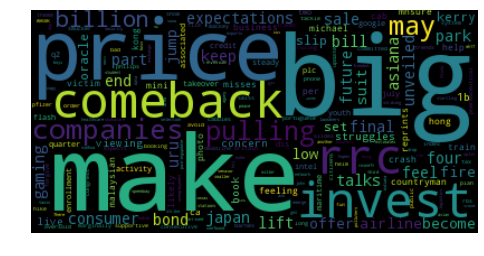

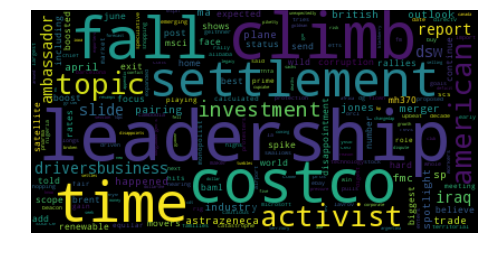

In [43]:
wordcloud = WordCloud(collocations=False).generate(positive)
wordcloud2 = WordCloud(collocations=False).generate(negative)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

look into the news which includes strange words, such as soya  
use seaborn to visialize the data

In [44]:
NEWS_df[NEWS_df['TITLE'].str.contains('surgesus', na=False)]

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,ticker


In [45]:
with open('stopwords.txt') as f:
    stop_words = []
    for line in f:
        stop_words.append(line.rstrip())

In [46]:
def eliminate_stop_words(counter):
    dummy = counter.copy()
    punc = set(string.punctuation)
    punc.update(['...', '–'])
    for key, num in dummy.items():
        if key.lower() in stop_words or key in punc:
            counter.pop(key)
    
    return counter

In [47]:
count_up = eliminate_stop_words(count_up)
count_down = eliminate_stop_words(count_down)

In [48]:
def create_freq_table(counter, num):
    """
    counter: counter object
    num: int, which specify how many most common words it is needed to return
    return: DataFrame
    """
    counter2 = counter.most_common(num)
    counter2 = sorted(counter2, key=lambda tup: tup[1], reverse=True)
    
    words_freqs_up = {'words': [tup[0] for tup in counter2],
                      'freqs': [tup[1] for tup in counter2]}
    words_freqs_df = pd.DataFrame(words_freqs_up)
    
    return words_freqs_df

In [49]:
words_freqs_up_df = create_freq_table(count_up, 10)
words_freqs_down_df = create_freq_table(count_down, 10)

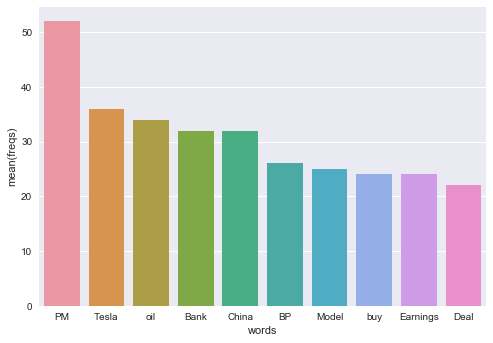

In [50]:
my_plot = sns.barplot(x='words', y='freqs', data=words_freqs_up_df)
my_plot.get_figure().savefig('freq_up.png', dpi=200)
sns.plt.show()

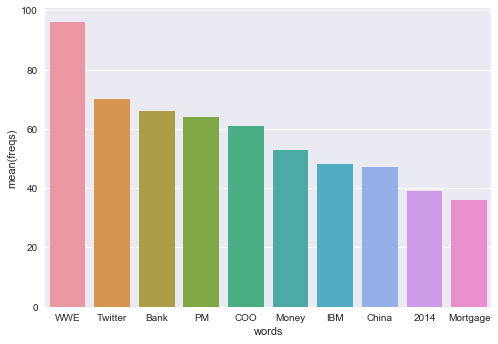

In [51]:
my_plot2 = sns.barplot(x='words', y='freqs', data=words_freqs_down_df)
my_plot2.get_figure().savefig('freq_down.png', dpi=200)
sns.plt.show()

In [52]:
words_freqs_up_df = create_freq_table(count_up, 30)
words_freqs_down_df = create_freq_table(count_down, 30)

In [53]:
down_set = set(words_freqs_down_df.words)
words_freqs_up_df[words_freqs_up_df.apply(lambda row: row['words'] not in down_set, axis=1)]

,freqs,words
1,36,Tesla
6,25,Model
7,24,buy
8,24,Earnings
9,22,Deal
11,21,billion
13,21,Stock
14,21,NC
15,19,Market
16,18,Obamacare


In [54]:
up_set = set(words_freqs_up_df.words)
words_freqs_down_df[words_freqs_down_df.apply(lambda row: row['words'] not in up_set, axis=1)]

,freqs,words
0,96,WWE
4,61,COO
5,53,Money
6,48,IBM
8,39,2014
9,36,Mortgage
10,33,Rowghani
11,32,Australian
14,25,black
15,24,Dollar


In [55]:
NEWS_df[NEWS_df['TITLE'].str.contains('WWE', na=False)]

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,ticker
212740,213186,WWE investors call for Vince McMahon's head on...,http://www.cagesideseats.com/wwe/2014/5/17/572...,Cageside Seats \(blog\),b,dQ4Thx_EFXNgPHMYd8x6fhgp40PWM,www.cagesideseats.com,2014-05-18 02:52:10.531,NaN
212741,213187,WWE to address stockholders on Monday morning,http://fansided.com/2014/05/17/wwe-address-sto...,FanSided,b,dQ4Thx_EFXNgPHMYd8x6fhgp40PWM,fansided.com,2014-05-18 02:52:10.795,NaN
212743,213189,WWE stock plunges; Vince McMahon loses $357 mi...,http://www.sportingnews.com/soccer/story/2014-...,SportingNews.com,b,dQ4Thx_EFXNgPHMYd8x6fhgp40PWM,www.sportingnews.com,2014-05-18 02:52:11.352,NaN
212744,213190,WWE Owner McMahon Falls Out of the Billionaire...,http://www.newsmax.com/US/wwe-subscription-vin...,Newsmax.com,b,dQ4Thx_EFXNgPHMYd8x6fhgp40PWM,www.newsmax.com,2014-05-18 02:52:11.637,NaN
212745,213191,WWE Network News: Vince McMahon Net Worth Shri...,http://www.latinpost.com/articles/12830/201405...,Latin Post,b,dQ4Thx_EFXNgPHMYd8x6fhgp40PWM,www.latinpost.com,2014-05-18 02:52:12.015,CEO
212746,213192,WWE CEO Vince McMahon no longer a billionaire ...,http://www.sportskeeda.com/wwe/wwe-ceo-vince-m...,Sportskeeda \(blog\),b,dQ4Thx_EFXNgPHMYd8x6fhgp40PWM,www.sportskeeda.com,2014-05-18 02:52:12.298,CEO
212747,213193,WWE shares dive on investor disappointment,http://www.krdo.com/news/economy-tracker/WWE-s...,KRDO,b,dQ4Thx_EFXNgPHMYd8x6fhgp40PWM,www.krdo.com,2014-05-18 02:52:12.605,NaN
212748,213194,// Backstage Reaction to WWE Stock Drop,http://www.411mania.com/wrestling/news/323029,411mania.com,b,dQ4Thx_EFXNgPHMYd8x6fhgp40PWM,www.411mania.com,2014-05-18 02:52:12.858,WWE
212749,213195,Who Is To Blame For The WWE's Stock Price Woes?,http://www.411mania.com/wrestling/columns/3230...,411mania.com,b,dQ4Thx_EFXNgPHMYd8x6fhgp40PWM,www.411mania.com,2014-05-18 02:52:13.092,NaN
212752,213198,WWE Stock Takes A Huge Bodyslam,http://www.rantsports.com/pro-wrestling/2014/0...,Rant Sports,b,dQ4Thx_EFXNgPHMYd8x6fhgp40PWM,www.rantsports.com,2014-05-18 02:52:13.872,A
